<a href="https://colab.research.google.com/github/jyns417/Datathon/blob/main/Danyoung_OlympicData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
athlete_events = pd.read_csv("athlete_events.csv")
noc_regions = pd.read_csv("noc_regions.csv")

In [60]:
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [61]:
noc_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [62]:
athlete_events.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


In [63]:
noc_regions.isnull().sum()

,0
NOC,0
region,3
notes,209


In [64]:
noc_regions[noc_regions['region'].isnull()]

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


In [65]:
athlete_events[athlete_events['NOC'] == 'TUV']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
64674,33094,Logona Esau,M,21.0,163.0,69.0,Tuvalu,TUV,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Men's Lightweight,NaN
132436,66655,Tuau Lapua Lapua,M,21.0,140.0,62.0,Tuvalu,TUV,2012 Summer,2012,Summer,London,Weightlifting,Weightlifting Men's Featherweight,NaN
148612,74540,Asenate Manoa,F,16.0,NaN,46.0,Tuvalu,TUV,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's 100 metres,NaN
148613,74540,Asenate Manoa,F,20.0,NaN,46.0,Tuvalu,TUV,2012 Summer,2012,Summer,London,Athletics,Athletics Women's 100 metres,NaN
172492,86663,Tavevele Noa,M,20.0,176.0,74.0,Tuvalu,TUV,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 100 metres,NaN
240317,120422,Etimoni Timuani,M,24.0,184.0,72.0,Tuvalu,TUV,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 100 metres,NaN
240342,120439,Okilani Tinilau,M,19.0,NaN,NaN,Tuvalu,TUV,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 100 metres,NaN


In [66]:
noc_regions.loc[noc_regions['NOC'] == 'TUV', 'region'] = 'Tuvalu'

In [67]:
athlete_events['NOC'].nunique()

230

In [68]:
athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [69]:
noc_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  228 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [70]:
athlete_events = athlete_events.merge(noc_regions, on='NOC', how='left')

In [71]:
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [72]:
athlete_events.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


In [73]:
athlete_events[athlete_events['region'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
578,332,Zarinah Abdullah,F,21.0,NaN,NaN,Singapore,SGP,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NaN,NaN,NaN
579,332,Zarinah Abdullah,F,25.0,NaN,NaN,Singapore,SGP,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,NaN,NaN,NaN
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28.0,173.0,68.0,Singapore,SGP,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NaN,NaN,NaN
6267,3515,Paulo Amotun Lokoro,M,24.0,170.0,61.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN,NaN,Refugee Olympic Team
7659,4264,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268752,134454,Zhang Guirong,F,26.0,182.0,95.0,Singapore,SGP,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Shot Put,NaN,NaN,NaN
268753,134454,Zhang Guirong,F,30.0,182.0,95.0,Singapore,SGP,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,NaN,NaN,NaN
268993,134587,Zhang Xueling,F,21.0,163.0,53.0,Singapore,SGP,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Singles,NaN,NaN,NaN
268994,134587,Zhang Xueling,F,21.0,163.0,53.0,Singapore-1,SGP,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Doubles,NaN,NaN,NaN


In [74]:
athlete_events[athlete_events['region'].isnull()]['NOC'].unique()

array(['SGP', 'ROT', 'UNK'], dtype=object)

In [75]:
athlete_events[(athlete_events['region'].isnull()) & (athlete_events['NOC'] == 'ROT')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
6267,3515,Paulo Amotun Lokoro,M,24.0,170.0,61.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN,NaN,Refugee Olympic Team
7908,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,NaN,NaN,Refugee Olympic Team
7909,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,NaN,NaN,Refugee Olympic Team
21529,11364,Yiech Pur Biel,M,21.0,178.0,62.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 800 metres,NaN,NaN,Refugee Olympic Team
31708,16287,Mabika Yolande Bukasa,F,28.0,170.0,70.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Women's Middleweight,NaN,NaN,Refugee Olympic Team
40238,20693,James Nyang Chiengjiek,M,24.0,179.0,59.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres,NaN,NaN,Refugee Olympic Team
119392,60444,Yonas Kinde,M,36.0,172.0,57.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Marathon,NaN,NaN,Refugee Olympic Team
141669,71067,Anjelina Nadai Lohalith,F,23.0,163.0,50.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Women's 1,500 metres",NaN,NaN,Refugee Olympic Team
141753,71113,Rose Nathike Lokonyen,F,21.0,157.0,50.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 800 metres,NaN,NaN,Refugee Olympic Team
149306,74902,Yusra Mardini,F,18.0,157.0,53.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 100 metres Freestyle,NaN,NaN,Refugee Olympic Team


In [76]:
athlete_events.loc[athlete_events['NOC'] == 'ROT', 'region'] = 'Refugee Olympic Athletes'

In [77]:
athlete_events[(athlete_events['region'].isnull()) & (athlete_events['NOC'] == 'SGP')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
578,332,Zarinah Abdullah,F,21.0,NaN,NaN,Singapore,SGP,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NaN,NaN,NaN
579,332,Zarinah Abdullah,F,25.0,NaN,NaN,Singapore,SGP,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,NaN,NaN,NaN
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28.0,173.0,68.0,Singapore,SGP,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NaN,NaN,NaN
7659,4264,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NaN,NaN,NaN
7660,4264,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268752,134454,Zhang Guirong,F,26.0,182.0,95.0,Singapore,SGP,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Shot Put,NaN,NaN,NaN
268753,134454,Zhang Guirong,F,30.0,182.0,95.0,Singapore,SGP,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,NaN,NaN,NaN
268993,134587,Zhang Xueling,F,21.0,163.0,53.0,Singapore,SGP,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Singles,NaN,NaN,NaN
268994,134587,Zhang Xueling,F,21.0,163.0,53.0,Singapore-1,SGP,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Doubles,NaN,NaN,NaN


In [78]:
athlete_events.loc[athlete_events['NOC'] == 'SGP', 'region'] = 'Singapore'

In [79]:
athlete_events[(athlete_events['region'].isnull()) & (athlete_events['NOC'] == 'UNK')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
61080,31292,Fritz Eccard,M,NaN,NaN,NaN,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,NaN,NaN,Unknown
130721,65813,A. Laffen,M,NaN,NaN,NaN,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,NaN,NaN,Unknown


In [80]:
athlete_events = athlete_events[athlete_events['NOC'] != 'UNK']

In [81]:
athlete_events.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9472
Height,60169
Weight,62873
Team,0
NOC,0
Games,0
Year,0


In [82]:
athlete_events['Age'].fillna(athlete_events['Age'].mean(), inplace=True)
athlete_events['Height'].fillna(athlete_events['Height'].mean(), inplace=True)
athlete_events['Weight'].fillna(athlete_events['Weight'].mean(), inplace=True)

In [83]:
athlete_events.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,0
Height,0
Weight,0
Team,0
NOC,0
Games,0
Year,0


In [94]:
athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271114 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271114 non-null  int64  
 1   Name    271114 non-null  object 
 2   Sex     271114 non-null  object 
 3   Age     271114 non-null  float64
 4   Height  271114 non-null  float64
 5   Weight  271114 non-null  float64
 6   Team    271114 non-null  object 
 7   NOC     271114 non-null  object 
 8   Games   271114 non-null  object 
 9   Year    271114 non-null  int64  
 10  Season  271114 non-null  object 
 11  City    271114 non-null  object 
 12  Sport   271114 non-null  object 
 13  Event   271114 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  271114 non-null  object 
 16  notes   5037 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [99]:
athlete_events['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [103]:
# Medal 값을 정수로 변환
athlete_events['Medal'] = athlete_events['Medal'].replace({
    'Gold': 3,
    'Silver': 2,
    'Bronze': 1,
    np.nan: 0  # 결측치를 0으로 대체
}).astype(int)

In [104]:
athlete_events['Medal'].unique()
athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271114 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271114 non-null  int64  
 1   Name    271114 non-null  object 
 2   Sex     271114 non-null  object 
 3   Age     271114 non-null  float64
 4   Height  271114 non-null  float64
 5   Weight  271114 non-null  float64
 6   Team    271114 non-null  object 
 7   NOC     271114 non-null  object 
 8   Games   271114 non-null  object 
 9   Year    271114 non-null  int64  
 10  Season  271114 non-null  object 
 11  City    271114 non-null  object 
 12  Sport   271114 non-null  object 
 13  Event   271114 non-null  object 
 14  Medal   271114 non-null  int64  
 15  region  271114 non-null  object 
 16  notes   5037 non-null    object 
dtypes: float64(3), int64(3), object(11)
memory usage: 37.2+ MB


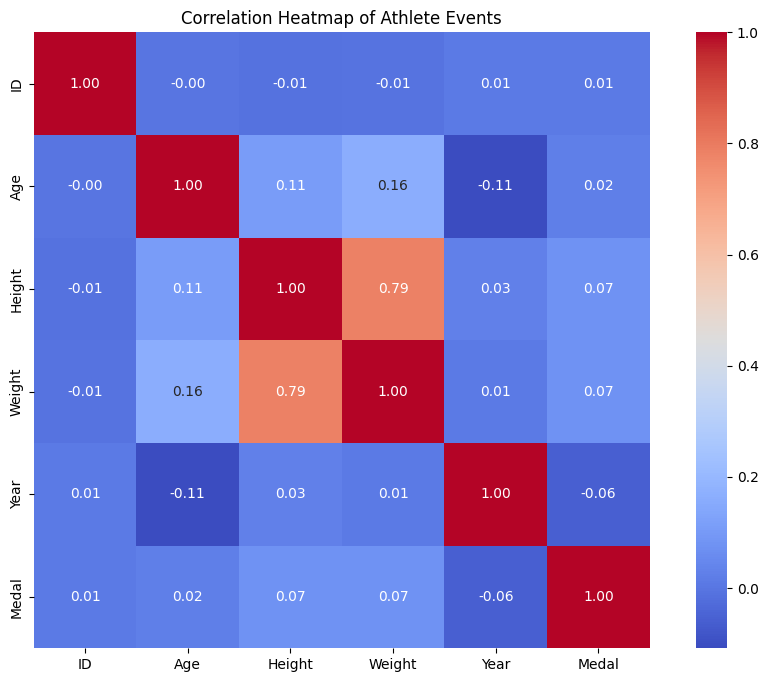

In [107]:
# 수치형 데이터만 선택
numeric_columns = athlete_events.select_dtypes(include=['float64', 'int64'])

# 수치형 데이터의 상관행렬 계산
correlation_matrix = numeric_columns.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))  # 크기 설정
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

# 제목 추가
plt.title('Correlation Heatmap of Athlete Events')
plt.show()

도출할 만한 인사이트 없음

In [108]:
# 메달 데이터에서 결측치 제외
medals_data = athlete_events[athlete_events['Medal'] > 0]

# 국가별 메달 획득 수 계산
medals_by_country = medals_data.groupby('NOC')['Medal'].count().reset_index()

# 메달 획득 수 내림차순 정렬
medals_by_country = medals_by_country.sort_values(by='Medal', ascending=False)

medals_by_country

,NOC,Medal
141,USA,5637
139,URS,2503
49,GER,2165
46,GBR,2068
43,FRA,1777
...,...,...
114,SEN,1
127,TGA,1
36,ERI,1
29,CYP,1


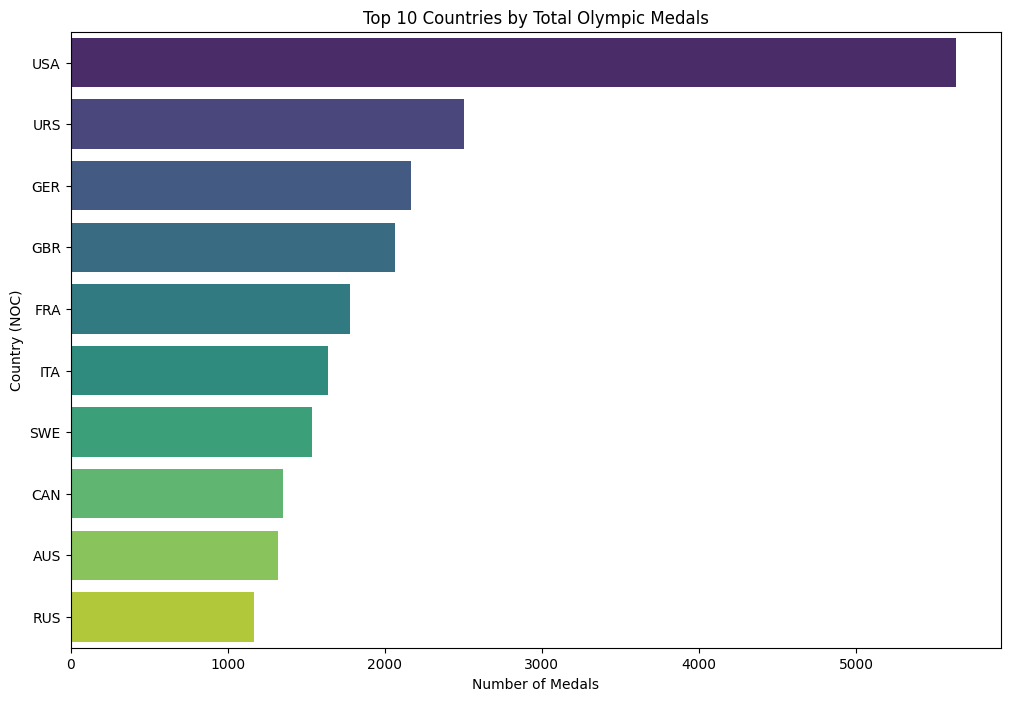

In [109]:
# 국가별 메달 획득 수 상위 10개 국가 선택
top_10_countries = medals_by_country.head(10)

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Medal', y='NOC', data=top_10_countries, palette='viridis')

# 제목 및 레이블 추가
plt.title('Top 10 Countries by Total Olympic Medals')
plt.xlabel('Number of Medals')
plt.ylabel('Country (NOC)')

# 그래프 보여주기
plt.show()